In [2]:
!pip install matplotlib seaborn scikit-learn pandas


  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 885.6 kB/s eta 0:00:09
   --- ------------------------------------ 0.8/8.1 MB 860.9 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/8.1 MB 883.6 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.1 MB 1.0 MB/s eta 0:00:07
   ------- -------------------------------- 1.6/8.1 MB 1.0 MB/s eta 0:00:07
   --------- ------------------------------ 1.8/8.1 MB 1.1 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.1 MB/s eta 0:00:06
   ----------- ---------------------------- 2.4/8.1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [5]:
df=pd.read_csv("CO2 Emissions_Canada.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [6]:
df = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'Fuel Type', 'CO2 Emissions(g/km)']]
df_encode=pd.get_dummies(df,columns=['Fuel Type'],drop_first=True)
df_encode

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,8.5,196,False,False,False,True
1,2.4,4,9.6,221,False,False,False,True
2,1.5,4,5.9,136,False,False,False,True
3,3.5,6,11.1,255,False,False,False,True
4,3.5,6,10.6,244,False,False,False,True
...,...,...,...,...,...,...,...,...
7380,2.0,4,9.4,219,False,False,False,True
7381,2.0,4,9.9,232,False,False,False,True
7382,2.0,4,10.3,240,False,False,False,True
7383,2.0,4,9.9,232,False,False,False,True


np.float64(0.8511446437900011)

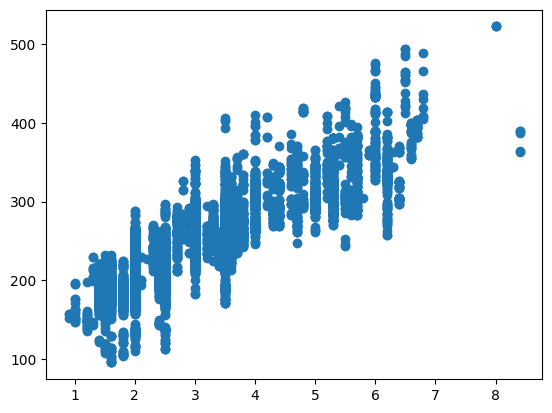

In [7]:
plt.scatter(df_encode['Engine Size(L)'],df_encode['CO2 Emissions(g/km)'])
df_encode['CO2 Emissions(g/km)'].corr(df_encode['Engine Size(L)'])

np.float64(0.8326436002237771)

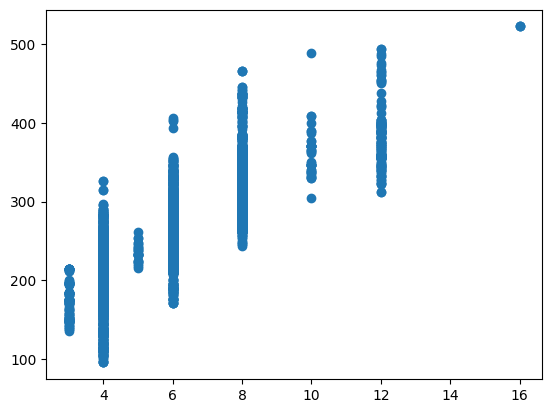

In [8]:
plt.scatter(df_encode['Cylinders'],df_encode['CO2 Emissions(g/km)'])
df_encode['CO2 Emissions(g/km)'].corr(df_encode['Cylinders'])

np.float64(0.9180515723870845)

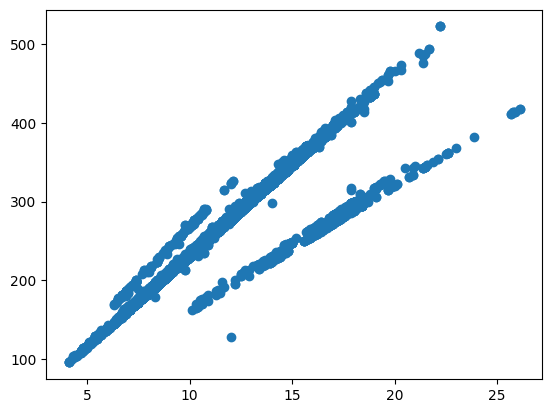

In [9]:
plt.scatter(df_encode['Fuel Consumption Comb (L/100 km)'],df_encode['CO2 Emissions(g/km)'])
df_encode['CO2 Emissions(g/km)'].corr(df_encode['Fuel Consumption Comb (L/100 km)'])

np.float64(0.0961966656010741)

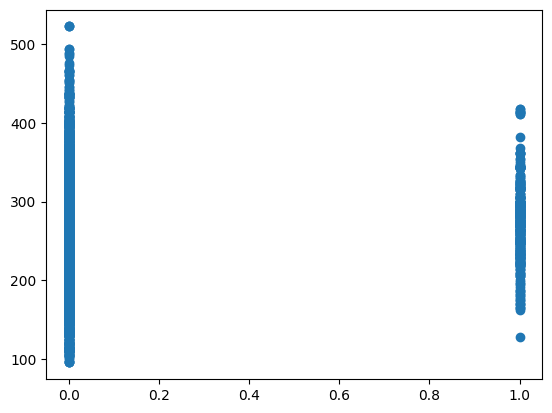

In [10]:
plt.scatter(df_encode['Fuel Type_E'],df_encode['CO2 Emissions(g/km)'])
df_encode['CO2 Emissions(g/km)'].corr(df_encode['Fuel Type_E'])

In [11]:
X_train,X_test,y_train,y_test=train_test_split(df_encode.drop('CO2 Emissions(g/km)',axis=1),df_encode['CO2 Emissions(g/km)'],test_size=0.2,random_state=42)

In [12]:
lr=LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_predict=lr.predict(X_test)
y_predict


array([254.17230882, 340.66090853, 325.48376035, ..., 183.10815339,
       238.66646295, 192.34983953], shape=(1477,))

In [14]:

y_test

7261    253
4489    344
1539    322
3532    297
6418    308
       ... 
7185    221
1740    260
4609    184
1844    235
5154    193
Name: CO2 Emissions(g/km), Length: 1477, dtype: int64

Text(0.5, 1.0, 'Actual vs Predicted CO2 Emissions')

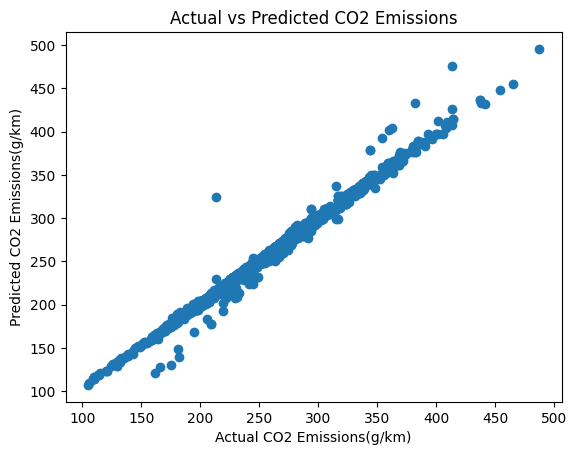

In [15]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual CO2 Emissions(g/km)")
plt.ylabel("Predicted CO2 Emissions(g/km)")
plt.title("Actual vs Predicted CO2 Emissions")

In [16]:
print("MAE:",mean_absolute_error(y_predict,y_test))
print("MSE:",mean_squared_error(y_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_predict,y_test)))
print("R2 Score:",r2_score(y_predict,y_test))
print("adjusted R2 score:",1-((1-r2_score(y_predict,y_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MAE: 3.2388509212233214
MSE: 40.14171487209187
RMSE: 6.335748959049109
R2 Score: 0.9883169584326491
adjusted R2 score: 0.9882612870296733


In [17]:
X_test.shape

(1477, 7)

In [18]:
# Example of predicting for a single new data point.
# Replace these values with the actual values for the new data point.
new_data_point = np.array([[4, 6, 11, 0, 0, 0, 1]]) # Reshape the input to be 2D

lr.predict(new_data_point)

c:\Users\Ramanjan Manchikatla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([256.65833435])

In [19]:
import joblib
joblib.dump(lr, 'co2_emission_model.pkl')

['co2_emission_model.pkl']

In [20]:
joblib.dump(X_train.columns.tolist(), 'model_columns.pkl')


['model_columns.pkl']